<left><a href="https://ubiqum.com/programs/data-analytics-and-machine-learning-program/"><img src = "https://scontent-ber1-1.cdninstagram.com/vp/706a70a2cf2361d0b5c0c9335e9d06d1/5D6D4095/t51.2885-19/s320x320/22352400_125994984820756_7444932873942990848_n.jpg?_nc_ht=scontent-ber1-1.cdninstagram.com" width = 40> </a></left>

<h1 align=center>IoT - Analytics</h1>
<h2 align=center>Deep Analytics, Visualitzation and Modelling</h2>

<h3 align=left><font color = #277a9a>Task 3: <font color = black>Evaluate Techniques for Wifi Locationing</h3>

In the following I will use the machine learning technique to investigate the problem of indoor positioning (with the WAP signal) by using this Data Set: [UJIIndoorLoc Data Set ](http://archive.ics.uci.edu/ml/datasets/UJIIndoorLoc)

### Data Set Information:

Many real world applications need to know the localization of a user in the world to provide their services. Therefore, automatic user localization has been a hot research topic in the last years. Automatic user localization consists of estimating the position of the user (latitude, longitude and altitude) by using an electronic device, usually a mobile phone. Outdoor localization problem can be solved very accurately thanks to the inclusion of GPS sensors into the mobile devices. However, indoor localization is still an open problem mainly due to the loss of GPS signal in indoor environments. Although, there are some indoor positioning technologies and methodologies, this database is focused on WLAN fingerprint-based ones (also know as WiFi Fingerprinting). 

Although there are many papers in the literature trying to solve the indoor localization problem using a WLAN fingerprint-based method, there still exists one important drawback in this field which is the lack of a common database for comparison purposes. So, UJIIndoorLoc database is presented to overcome this gap. We expect that the proposed database will become the reference database to compare different indoor localization methodologies based on WiFi fingerprinting. 

The UJIIndoorLoc database covers three buildings of Universitat Jaume I with 4 or more floors and almost 110.000m2. It can be used for classification, e.g. actual building and floor identification, or regression, e.g. actual longitude and latitude estimation. It was created in 2013 by means of more than 20 different users and 25 Android devices. The database consists of 19937 training/reference records (trainingData.csv file) and 1111 validation/test records (validationData.csv file). 

The 529 attributes contain the WiFi fingerprint, the coordinates where it was taken, and other useful information. 

Each WiFi fingerprint can be characterized by the detected Wireless Access Points (WAPs) and the corresponding Received Signal Strength Intensity (RSSI). The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. The positive value 100 is used to denote when a WAP was not detected. During the database creation, 520 different WAPs were detected. Thus, the WiFi fingerprint is composed by 520 intensity values. 

Then the coordinates (latitude, longitude, floor) and Building ID are provided as the attributes to be predicted. 

Additional information has been provided. 

The particular space (offices, labs, etc.) and the relative position (inside/outside the space) where the capture was taken have been recorded. Outside means that the capture was taken in front of the door of the space. 

Information about who (user), how (android device & version) and when (timestamp) WiFi capture was taken is also recorded. 

### Attribute Information:

- **Attribute 001 - 520 (WAP001 - WAP520):** Intensity value for WAP001 - WAP520. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 - WAP520 was not detected.
- **Attribute 521 (Longitude):** Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000 
- **Attribute 522 (Latitude):** Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018. 
- **Attribute 523 (Floor):** Altitude in floors inside the building. Integer values from 0 to 4. 
- **Attribute 524 (BuildingID):** ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2. 
- **Attribute 525 (SpaceID):** Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values. 
- **Attribute 526 (RelativePosition):** Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values. 
- **Attribute 527 (UserID):** User identifier (see below). Categorical integer values. 
- **Attribute 528 (PhoneID):** Android device identifier (see below). Categorical integer values. 
- **Attribute 529 (Timestamp):** UNIX Time when the capture was taken. Integer value. 

### Index:

* [001 - Library import](#library_import)

* [002 - Data loading](#data_loading)

* [003 - Data exploration](#data_exploration)

* [004 - Data cleaning](#data_cleaning)

* [005 - Data exporting](#data_exporting)

### 001 - Library import <a id='library_import'></a>

In [1]:
import numpy as np
print ('Numpy: ', np.__version__)
import pandas as pd
print ('Pandas: ', pd.__version__)

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print ('Matplotlib: ', mpl.__version__)

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
print ('Plotly: ', plotly.__version__)

import seaborn as sns
print ('Seaborn: ', sns.__version__)

import sklearn as sk
from sklearn import preprocessing
print ('scikit-learn: ', sk.__version__)

Numpy:  1.15.4
Pandas:  0.23.4
Matplotlib:  3.0.2
Plotly:  3.8.1
Seaborn:  0.9.0
scikit-learn:  0.21.0


### 002 - Data loading  <a id='data_loading'></a>

In [2]:
df_train = pd.read_csv("trainingData.csv")
df_valid = pd.read_csv("validationData.csv")
print('Data loading into the dataframe!')

Data loading into the dataframe!


### 003 - Data exploration <a id='data_exploration'></a>

In [3]:
print ('dimensions (rows, column)')
print ('train:', df_train.shape)
print ('valid:', df_valid.shape)

dimensions (rows, column)
train: (19937, 529)
valid: (1111, 529)


In [4]:
print (df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB
None


In [5]:
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
df_train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
# The most common type for Floor and BuildingID
print (df_train[['FLOOR', 'BUILDINGID']].astype(str).describe(include=['object']))

        FLOOR BUILDINGID
count   19937      19937
unique      5          3
top         3          2
freq     5048       9492


In [8]:
FLOOR_uni = df_train["FLOOR"].unique()
print('Unique Floors : {}'.format(FLOOR_uni))
BUILDINGID_uni = df_train["BUILDINGID"].unique()
print('Unique Buildings : {}'.format(BUILDINGID_uni))

Unique Floors : [2 0 3 4 1]
Unique Buildings : [1 0 2]


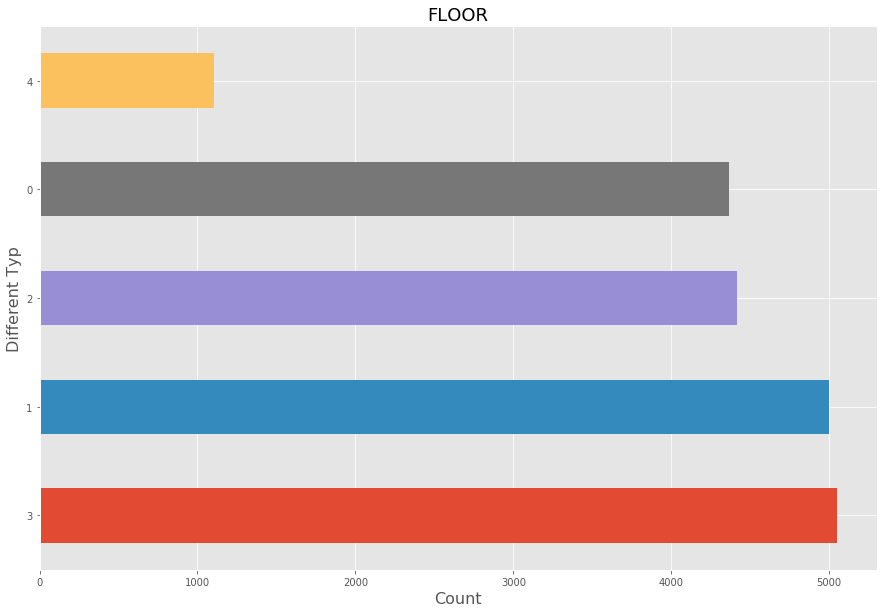

In [9]:
FLOOR_count = df_train['FLOOR'].value_counts()

FLOOR_count.plot(kind='barh', figsize=(15,10))
plt.title('FLOOR', fontsize=18)
plt.ylabel('Different Typ', fontsize=16)
plt.xlabel('Count', fontsize=16)

plt.show()

Text(0.5, 0, 'Count')

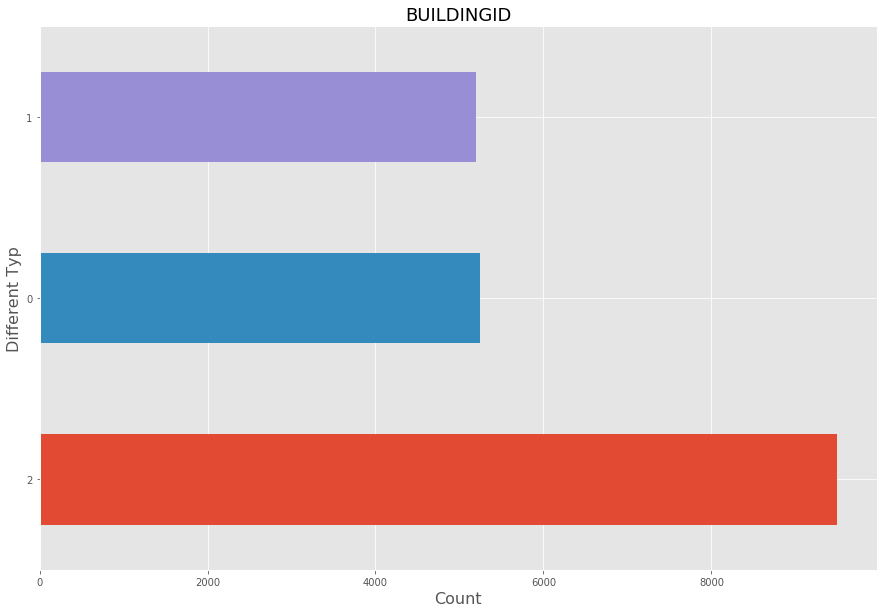

In [10]:
BUILDINGID_count = df_train['BUILDINGID'].value_counts()

BUILDINGID_count.plot(kind='barh', figsize=(15,10))
plt.title('BUILDINGID', fontsize=18)
plt.ylabel('Different Typ', fontsize=16)
plt.xlabel('Count', fontsize=16)



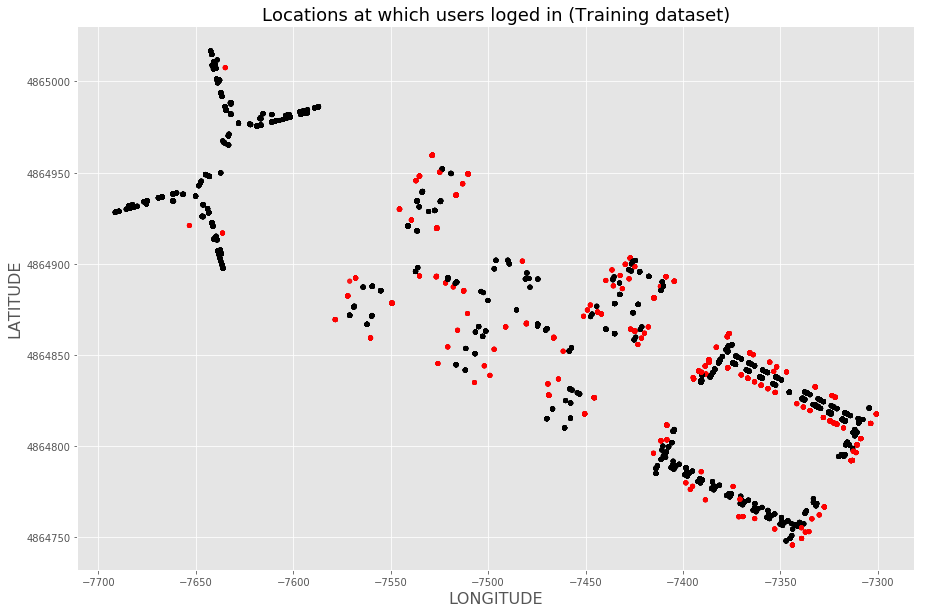

In [11]:
colors = np.where(df_train["RELATIVEPOSITION"]==1,'red','black')
df_train.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",
              c=colors,
              figsize=(15,10),
              alpha=0.5)
plt.title('Locations at which users loged in (Training dataset)', fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)

plt.show()

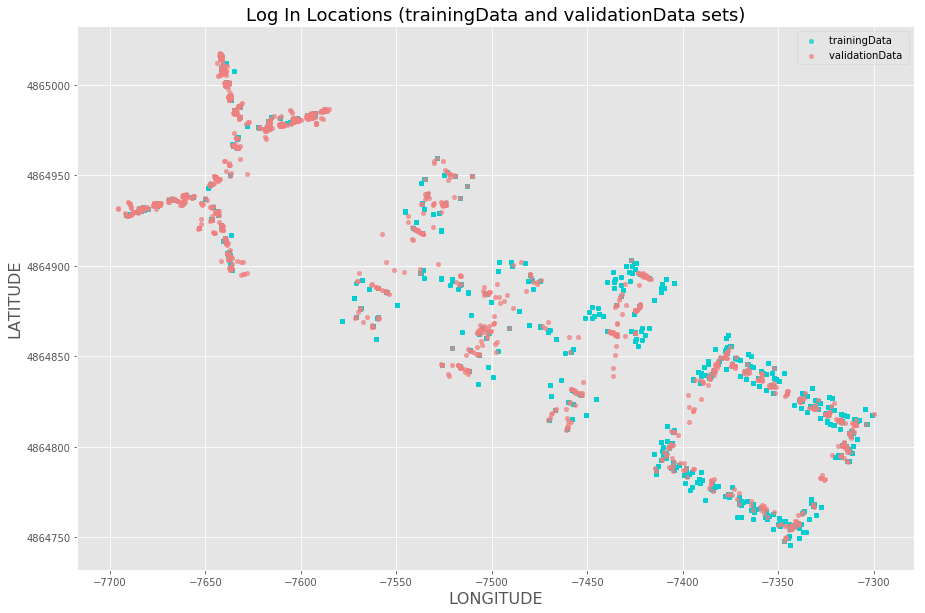

In [12]:
ax1 = df_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'trainingData ',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)
ax2 = df_valid.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'validationData ',
                    color="lightcoral",
                    figsize=(15,10),
                    alpha=0.75,
                    ax=ax1)

plt.title("Log In Locations (trainingData and validationData sets)", fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)
plt.legend(loc='best')

In [13]:
# Training Data
df_train['WAP_COUNT'] = df_train[df_train.iloc[:,:-9] != 100 ].count(axis=1)
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0


In [14]:
# Test Data
df_valid['WAP_COUNT'] = df_valid[df_valid.iloc[:,:-9] != 100 ].count(axis=1)
df_valid.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,14


In [15]:
# Create dataset for each building
# Training Data
Bldg01_train = df_train[df_train['BUILDINGID'] == 0]
Bldg02_train = df_train[df_train['BUILDINGID'] == 1]
Bldg03_train = df_train[df_train['BUILDINGID'] == 2]
# Test Data
Bldg01_valid = df_valid[df_valid['BUILDINGID'] == 0]
Bldg02_valid = df_valid[df_valid['BUILDINGID'] == 1]
Bldg03_valid = df_valid[df_valid['BUILDINGID'] == 2]

Text(0, 0.5, 'count')

<Figure size 432x288 with 0 Axes>

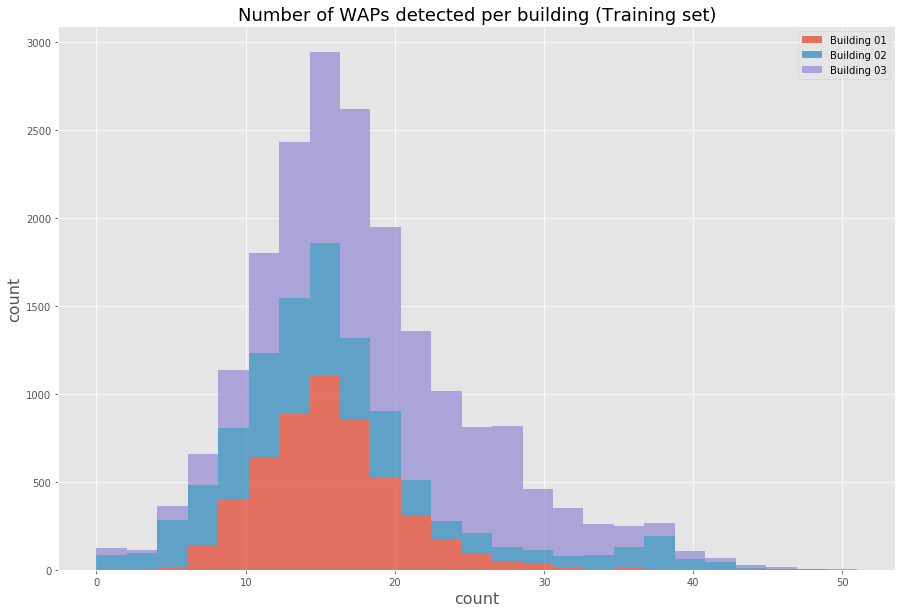

In [16]:
Bldg = pd.DataFrame({'Building 01': Bldg01_train['WAP_COUNT'],
                     'Building 02': Bldg02_train['WAP_COUNT'],
                     'Building 03': Bldg03_train['WAP_COUNT']},
                    columns=['Building 01',
                             'Building 02',
                             'Building 03'])

plt.figure();

Bldg.plot.hist(stacked=True,
               figsize=(15,10),
               alpha=0.75,
               bins=25)

plt.title("Number of WAPs detected per building (Training set)", fontsize=18)
plt.xlabel('count', fontsize=16)
plt.ylabel('count', fontsize=16)

Text(0, 0.5, 'count')

<Figure size 432x288 with 0 Axes>

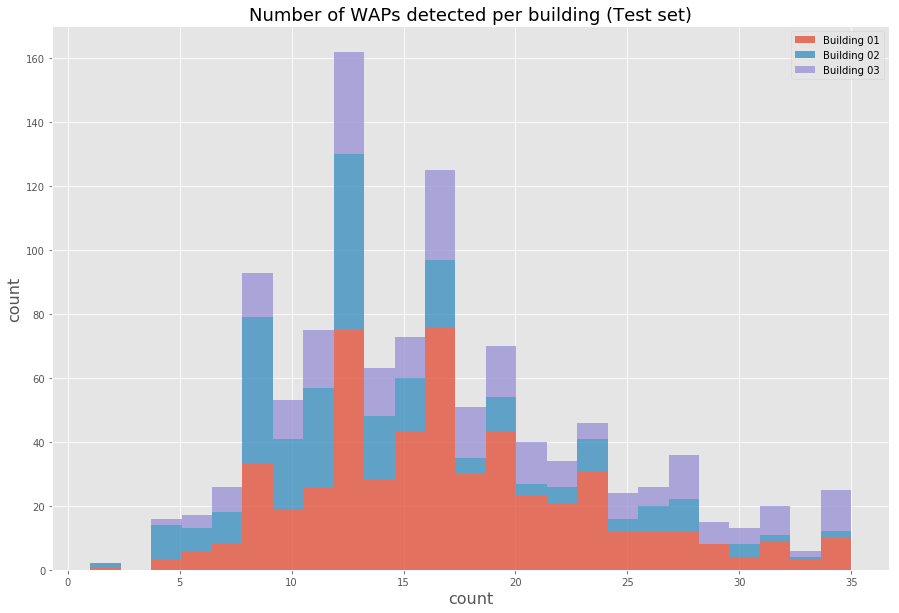

In [17]:
Bldg = pd.DataFrame({'Building 01': Bldg01_valid['WAP_COUNT'],
                     'Building 02': Bldg02_valid['WAP_COUNT'],
                     'Building 03': Bldg03_valid['WAP_COUNT']},
                    columns=['Building 01',
                             'Building 02',
                             'Building 03'])

plt.figure();

Bldg.plot.hist(stacked=True,
               figsize=(15,10),
               alpha=0.75,
               bins=25)

plt.title("Number of WAPs detected per building (Test set)", fontsize=18)
plt.xlabel('count', fontsize=16)
plt.ylabel('count', fontsize=16)

In [18]:
x = df_train['LONGITUDE']
y = df_train['LATITUDE']
z = df_train['FLOOR']
c = df_train['USERID']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        line=dict(
            color=c,
            width=1.5
        ),
        opacity=0.05
    )
    
)
data = [trace1]
layout = go.Layout(
    title=go.layout.Title(
        text='The individual buildings with floor and coloured UserId (Training dataset)',
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-plot')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### 004 - Data cleaning <a id='data_cleaning'></a>

In [19]:
print ('dimensions (rows, column)')
print ('train:', df_train.shape)
print ('valid:', df_valid.shape)

dimensions (rows, column)
train: (19937, 530)
valid: (1111, 530)


In [20]:
# identification of the WAP columns with only 100 Signal Strengh 
print ('WAP columns with only 100')
# Training dataset
df_train_column_select = np.sum(df_train,axis=0)
df_train_column_select = df_train_column_select[df_train_column_select == 1993700]
print ('train:', df_train_column_select.count())
# Test dataset
df_valid_column_select = np.sum(df_valid,axis=0)
df_valid_column_select = df_valid_column_select[df_valid_column_select == 111100]
print ('valid:', df_valid_column_select.count())

WAP columns with only 100
train: 55
valid: 153


In [21]:
# identification of the WAP rows with only 100 Signal Strengh 
print ('WAP rows with only 100')
# Training dataset
df_train_row_select = df_train.iloc[:,:-9]
df_train_row_select = np.sum(df_train_row_select, axis=1)
df_train_row_select = df_train_row_select[df_train_row_select == 52000]
print ('train:', df_train_row_select.count())
# Test dataset
df_valid_row_select = df_valid.iloc[:,:-9]
df_valid_row_select = np.sum(df_valid_row_select, axis=1)
df_valid_row_select = df_valid_row_select[df_valid_row_select == 52000]
print ('valid:', df_valid_row_select.count())

WAP rows with only 100
train: 0
valid: 0


In [22]:
# remove of the columns
print ('remove of the columns')
print ('dimensions (rows, column)')
# Training dataset
df_train_clean = df_train[df_train.columns[df_train.sum() != 1993700]]
print ('train:', df_train_clean.shape)
# Test dataset
df_valid_clean = df_valid[df_valid.columns[df_valid.sum() != 111100]]
print ('valid:', df_valid_clean.shape)

remove of the columns
dimensions (rows, column)
train: (19937, 475)
valid: (1111, 377)


In [23]:
# remove of the rows
print ('remove of the rows')
print ('dimensions (rows, column)')
# Training dataset
df_train_row_clean_select = df_train_clean.iloc[:,:-9]
df_train_row_clean_select
df_train_clean['rows'] = np.sum(df_train_row_clean_select, axis=1)
df_train_clean
df_train_clean = df_train_clean.drop(df_train_clean.index[df_train_clean.rows == 46500])
df_train_clean.drop('rows', axis=1, inplace=True)
print ('train:', df_train_clean.shape)
# Test dataset
df_valid_row_clean_select = df_valid_clean.iloc[:,:-9]
df_valid_row_clean_select
df_valid_clean['rows'] = np.sum(df_valid_row_clean_select, axis=1)
df_valid_clean
df_valid_clean = df_valid_clean.drop(df_valid_clean.index[df_valid_clean.rows == 36700])
df_valid_clean.drop('rows', axis=1, inplace=True)
print ('valid:', df_valid_clean.shape)

remove of the rows
dimensions (rows, column)
train: (19937, 475)
valid: (1111, 377)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
# remove the duplicate rows
print ('remove of the duplicate rows')
print ('dimensions (rows, column)')
# Training dataset
df_train_clean = df_train_clean.drop_duplicates()
print ('train:', df_train_clean.shape)
# Test dataset
df_valid_clean = df_valid_clean.drop_duplicates()
print ('valid:', df_valid_clean.shape)

remove of the duplicate rows
dimensions (rows, column)
train: (19300, 475)
valid: (1111, 377)


In [25]:
# create a column with variance of the WAP's
# Training dataset
COLUMN_NAMES=[]
df_train_var = pd.DataFrame(columns=COLUMN_NAMES)
df_train_var['variance'] = df_train_clean.var(axis=0)
print('train:', df_train_var.head())
print()
# Test dataset
COLUMN_NAMES=[]
df_valid_var = pd.DataFrame(columns=COLUMN_NAMES)
df_valid_var['variance'] = df_valid_clean.var(axis=0)
print('valid:', df_valid_var.head())

train:           variance
WAP001   35.554872
WAP002   34.727169
WAP005   76.674552
WAP006  542.948201
WAP007  962.615466

valid:            variance
WAP001   260.088043
WAP003    62.224722
WAP004    62.230128
WAP008  1033.545928
WAP009  1590.972042


In [26]:
# transpose the column with row
# Training dataset
df_train_var_trans = df_train_var.T
df_train_var_trans.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,35.554872,34.727169,76.674552,542.948201,962.615466,1018.971592,947.751602,118.464353,3753.383669,3787.276547,...,15424.129025,4566.568067,1.427852,0.703974,3340.157851,0.142063,25.159511,29.154591,3.176902e+11,53.593819


In [27]:
# Test dataset
df_valid_var_trans = df_valid_var.T
df_valid_var_trans.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,260.088043,62.224722,62.230128,1033.545928,1590.972042,222.95467,1885.36682,1971.743624,3803.388964,3985.253306,...,14450.284439,4938.266333,1.003659,0.666083,0.0,0.0,0.0,42.984231,2.503223e+11,47.523486


In [28]:
# set your variance threshold (less than 20 - it give us 1 or 0 as result) and combine it with the main dataset
# Training dataset
df_train_var_trans = df_train_var_trans.iloc[-1:,:] < 20
df_train_combine = pd.concat([df_train_var_trans, df_train_clean], sort=False)
df_train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.000000e+00,1,1,0,1,0,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16


In [29]:
# Test dataset
df_valid_var_trans = df_valid_var_trans.iloc[-1:,:] < 20
df_valid_combine = pd.concat([df_valid_var_trans, df_valid_clean], sort=False)
df_valid_combine.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000e+00,1,1,1,1,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,-87,-87,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,-73,-72,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,-77,-75,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10


In [30]:
# replace all 1 with NaN
# Training dataset
df_train_combine.iloc[:,:-9] = df_train_combine.replace(to_replace=1, value=np.nan)
df_train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.000000e+00,1,1,0,1,0,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16


In [31]:
# Test dataset
df_valid_combine.iloc[:,:-9] = df_valid_combine.replace(to_replace=1, value=np.nan)
df_valid_combine.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000e+00,1,1,1,1,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,-87,-87,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,-73,-72,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,-77,-75,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10


In [32]:
# remove all column with NaN
# Training dataset
df_train_combine.dropna(axis=1, inplace = True)
df_train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.000000e+00,1,1,0,1,0,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16


In [33]:
# Test dataset
df_valid_combine.dropna(axis=1, inplace = True)
df_valid_combine.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
variance,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000e+00,1,1,1,1,1,0,0,0
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,-87,-87,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,-73,-72,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,-77,-75,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10


In [34]:
# remove column variance
# Training dataset
df_train_combine = df_train_combine.drop(df_train_combine.index[0])
df_train_combine.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0


In [35]:
# remove column variance
# Test dataset
df_valid_combine = df_valid_combine.drop(df_valid_combine.index[0])
df_valid_combine.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,-87,-87,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,-73,-72,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,-77,-75,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10
4,100,100,100,100,100,100,100,100,-79,-79,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,14


In [36]:
df_train_clean = df_train_combine
df_valid_clean = df_valid_combine

In [37]:
# Training dataset
df_train_clean['TIMESTAMP'] = pd.to_datetime(df_train_clean['TIMESTAMP'], unit='s')
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,2013-05-30 10:28:30,0


In [38]:
# Test dataset
df_valid_clean['TIMESTAMP'] = pd.to_datetime(df_valid_clean['TIMESTAMP'], unit='s')
df_valid_clean.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,2013-10-04 07:45:03,1
1,100,100,100,100,100,100,-87,-87,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,2013-10-07 14:10:54,12
2,100,100,100,100,100,100,-73,-72,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,2013-10-07 14:11:35,10
3,100,100,100,100,100,100,-77,-75,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,2013-10-07 14:12:18,10
4,100,100,100,100,100,100,100,100,-79,-79,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,2013-10-04 09:09:34,14


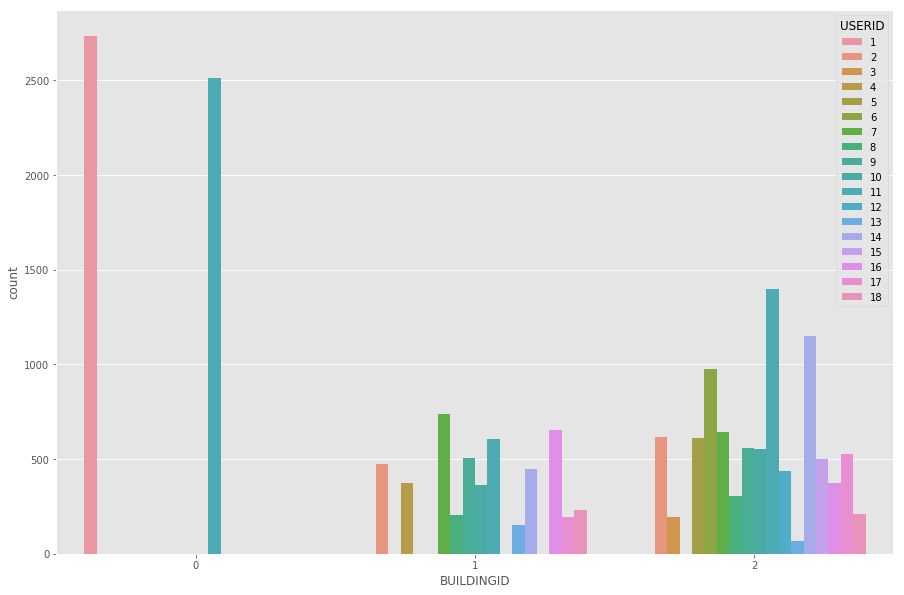

In [39]:
# remove strange UserID's
# Training dataset
plt.figure(figsize=(15,10))
sns.countplot(x="BUILDINGID", hue="USERID", data=df_train_clean, orient="v")

In [40]:
# Explore with Tableau which User collect Datasamples at the same time in different buildings
# It's User 7, 11, 16
# Training dataset
df_train_clean.drop(df_train_clean.loc[df_train_clean.USERID == 7].index, inplace=True)
df_train_clean.drop(df_train_clean.loc[df_train_clean.USERID == 11].index, inplace=True)
df_train_clean.drop(df_train_clean.loc[df_train_clean.USERID == 16].index, inplace=True)
print ('train:', df_train_clean.shape)
df_train_clean.head()

train: (12373, 394)


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47,16
5,100,100,100,100,100,100,100,100,100,100,...,-7533.8962,4.864939e+06,2,1,105,2,2,23,2013-06-20 07:37:21,15


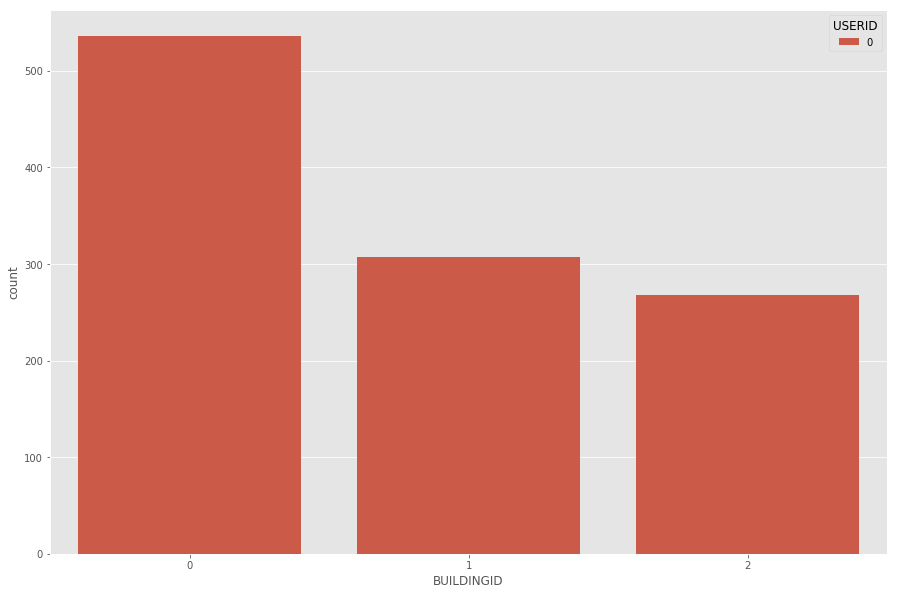

In [41]:
# Test dataset
plt.figure(figsize=(15,10))
sns.countplot(x="BUILDINGID", hue="USERID", data=df_valid_clean,orient="v")

In [42]:
# Change WAP values so that no signal is 0 and highest signal is 104
# Training Data
df_train_clean.iloc[:, :-4] = np.where(df_train_clean.iloc[:, :-4] <= 0,
                                       df_train_clean.iloc[:, :-4] + 105,
                                       df_train_clean.iloc[:, :-4] - 100)
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7436.2643,4.864821e+06,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:35:33,17
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7431.6212,4.864834e+06,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:34:51,16
2,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,-7414.1524,4.864850e+06,-98.0,-99.0,3.0,-98.0,2,23,2013-06-20 07:41:35,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7419.5704,4.864834e+06,-98.0,-99.0,2.0,-98.0,2,23,2013-06-20 07:36:47,16
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7428.8962,4.864839e+06,-98.0,-99.0,5.0,-98.0,2,23,2013-06-20 07:37:21,15


In [43]:
# Test data
df_valid_clean.iloc[:, :-4] = np.where(df_valid_clean.iloc[:, :-4] <= 0,
                                       df_valid_clean.iloc[:, :-4] + 105,
                                       df_valid_clean.iloc[:, :-4] - 100)
df_valid_clean.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7410.916799,4.864790e+06,-99.0,-99.0,105.0,105.0,0,0,2013-10-04 07:45:03,1
1,0.0,0.0,0.0,0.0,0.0,0.0,18.0,18.0,0.0,0.0,...,-7278.867221,4.864740e+06,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:10:54,12
2,0.0,0.0,0.0,0.0,0.0,0.0,32.0,33.0,0.0,0.0,...,-7269.302080,4.864747e+06,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:11:35,10
3,0.0,0.0,0.0,0.0,0.0,0.0,28.0,30.0,0.0,0.0,...,-7260.824883,4.864743e+06,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:12:18,10
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,26.0,...,-7536.499303,4.864822e+06,-98.0,105.0,105.0,105.0,0,2,2013-10-04 09:09:34,14


In [44]:
# Convert Longitude and Latitude values to absolute values
# Training Data
df_train_clean['ABSOLUTE_LONGITUDE'] = df_train_clean['LONGITUDE'] - df_train_clean['LONGITUDE'].min()
df_train_clean['ABSOLUTE_LATITUDE'] = df_train_clean['LATITUDE'] - df_train_clean['LATITUDE'].min()
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:35:33,17,150.0741,175.033184
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:34:51,16,154.7172,188.480184
2,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,3.0,-98.0,2,23,2013-06-20 07:41:35,15,172.1860,203.787184
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,2.0,-98.0,2,23,2013-06-20 07:36:47,16,166.7680,188.347984
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,5.0,-98.0,2,23,2013-06-20 07:37:21,15,157.4422,193.513284


In [45]:
# Test Data
df_valid_clean['ABSOLUTE_LONGITUDE'] = df_valid_clean['LONGITUDE'] - df_valid_clean['LONGITUDE'].min()
df_valid_clean['ABSOLUTE_LATITUDE'] = df_valid_clean['LATITUDE'] - df_valid_clean['LATITUDE'].min()
df_valid_clean.head()

,WAP001,WAP003,WAP004,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.0,-99.0,105.0,105.0,0,0,2013-10-04 07:45:03,1,180.021956,141.647431
1,0.0,0.0,0.0,0.0,0.0,0.0,18.0,18.0,0.0,0.0,...,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:10:54,12,312.071534,91.724822
2,0.0,0.0,0.0,0.0,0.0,0.0,32.0,33.0,0.0,0.0,...,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:11:35,10,321.636675,98.518237
3,0.0,0.0,0.0,0.0,0.0,0.0,28.0,30.0,0.0,0.0,...,-96.0,-98.0,105.0,105.0,0,13,2013-10-07 14:12:18,10,330.113872,94.813768
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,26.0,...,-98.0,105.0,105.0,105.0,0,2,2013-10-04 09:09:34,14,54.439452,174.383692


In [46]:
# check maximum values for longitude and latitude in training and test sets
print (df_train_clean['ABSOLUTE_LONGITUDE'].max())
print (df_valid_clean['ABSOLUTE_LONGITUDE'].max())

390.5194099061191
396.15223819905714


In [47]:
#remove all rows where LONGITUDE values from test set that are higher than in train set
print ('dimensions (rows, column)')
print ('befor:', df_valid_clean.shape)
df_valid_clean = df_valid_clean[df_valid_clean.ABSOLUTE_LONGITUDE < 390.5194099061191]
print ('after:', df_valid_clean.shape)

dimensions (rows, column)
befor: (1111, 379)
after: (1109, 379)


In [48]:
#df_train_clean['WAP_COUNT'] = df_train_clean['USERID']
df_train_clean['WAP_COUNT'] = df_train_clean[df_train_clean.iloc[:,:-11] != 0 ].count(axis=1)
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:35:33,18,150.0741,175.033184
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,6.0,-98.0,2,23,2013-06-20 07:34:51,17,154.7172,188.480184
2,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,3.0,-98.0,2,23,2013-06-20 07:41:35,16,172.1860,203.787184
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,2.0,-98.0,2,23,2013-06-20 07:36:47,17,166.7680,188.347984
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-98.0,-99.0,5.0,-98.0,2,23,2013-06-20 07:37:21,16,157.4422,193.513284


In [49]:
# Converting data types
# Training dataset
df_train_clean['FLOOR'] = df_train_clean['FLOOR'].astype('category')
df_train_clean['BUILDINGID'] = df_train_clean['BUILDINGID'].astype('category')
#df_train_clean['SPACEID'] = df_train_clean['SPACEID'].astype('category')
#df_train_clean['RELATIVEPOSITION'] = df_train_clean['RELATIVEPOSITION'].astype('category')
#df_train_clean['USERID'] = df_train_clean['USERID'].astype('category')
#df_train_clean['PHONEID'] = df_train_clean['PHONEID'].astype('category')
# Test dataset
#df_valid_clean['FLOOR'] = df_valid_clean['FLOOR'].astype('category')
#df_valid_clean['BUILDINGID'] = df_valid_clean['BUILDINGID'].astype('category')
#df_valid_clean['SPACEID'] = df_valid_clean['SPACEID'].astype('category')
#df_valid_clean['RELATIVEPOSITION'] = df_valid_clean['RELATIVEPOSITION'].astype('category')
#df_valid_clean['USERID'] = df_valid_clean['USERID'].astype('category')
#df_valid_clean['PHONEID'] = df_valid_clean['PHONEID'].astype('category')

In [53]:
df_train_clean.dtypes

WAP001                       float64
WAP002                       float64
WAP005                       float64
WAP006                       float64
WAP007                       float64
WAP008                       float64
WAP009                       float64
WAP010                       float64
WAP011                       float64
WAP012                       float64
WAP013                       float64
WAP014                       float64
WAP015                       float64
WAP016                       float64
WAP017                       float64
WAP018                       float64
WAP019                       float64
WAP020                       float64
WAP021                       float64
WAP022                       float64
WAP023                       float64
WAP024                       float64
WAP025                       float64
WAP026                       float64
WAP027                       float64
WAP028                       float64
WAP029                       float64
W

In [51]:
# remove unnecessary colums
print ('remove unnecessary colums')
print ('dimensions (rows, column)')
# Training dataset
df_train_clean_del = df_train_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)
print ('train:', df_train.shape)
# Test dataset
df_valid_clean_del = df_valid_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1)
print ('test:', df_valid.shape)

remove unnecessary colums
dimensions (rows, column)
train: (19937, 530)
test: (1111, 530)


### 005 - Data exporting <a id='data_exporting'></a>

In [52]:
df_train_clean_del.to_csv('trainingData_clean.csv')
df_valid_clean_del.to_csv('validationData_clean.csv')
print('Data exporting into the CSV file!')

Data exporting into the CSV file!
